## Кейс

Перед вами датасет с товарами Amazon.
> amazon_data.csv

Для каждого товара доступна его цена, скидка, рейтинг, количество отзывов и сами отзывы.

Описание датасета:
 - product_id - Идентификатор товара
 - product_name - Название товара
 - category - Категория товара
 - discounted_price - Цена со скидкой
 - actual_price - Цена без скидки
 - rating - Рейтинг
 - rating_count - Количество отзывов
 - about_product - Описание товара
 - user_id - Идентификаторы пользователей оставивших отзывы
 - user_name - Имена пользователей оставивших отзывы
 - review_id - Идентификаторы отзывов
 - review_title - Заголовки отзывов
 - review_content - Содержание отзывов
 - img_link - Ссылка на изображение товара
 - product_link - Ссылка на товар


Вам, как аналитикам, необходимо провести разведочный анализ:
1. Определите самые популярные категории и подкатегории товаров.
2. Разделите товары на группы по рейтингу. В какой категории самая высокая оценка товаров?
2. Исследуйте взаимосвязи между показателями, в том числе с категорией товаров.

Перед анализом проведите этап предобработки данных:
1. Проверьте наличие дубликатов
2. Разберитесь с пустыми значениями.
2. Подготовьте данные к анализу.

### Бонус *
Исследуйте отзывы на товары.
Составьте список пользователей, которые чаще остальных пишут отзывы:
1. Определите категории товаров, для которых эти пользователи пишут отзывы.
2. Видна ли какая-то аномалия в данных?




In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Импортируем данные
df = pd.read_csv('amazon_data.csv')

### Познакомимся с данными

In [ ]:
#Выведем первые 5 строк
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,299","₹2,495",48%,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...
1,B0BFBNXS94,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹669,"₹1,499",55%,2.3,13,✔【Easy to carry around】- This handheld blender...,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",https://m.media-amazon.com/images/I/417TQs3uro...,https://www.amazon.in/Personal-Blender-Portabl...
2,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹161,₹300,46%,2.6,24,Sealing Machine use for snack food saver stora...,"AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35AN...","Navin thawani,Amazon Customer,Jemiba Lawrence,...","R3M6NH8U0C7JBM,R32DO8SLNF2JSA,R3U0NCD7XO2KX4,R...","It is broken,Could have been a bit better,The ...",It is broken and it is not useful. Please chan...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Green-Tales-Sealer-Impul...
3,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,₹281,"₹1,999",86%,2.8,87,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...
4,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹499,"₹2,199",77%,2.8,109,Portable & Convenient to Charge: This little b...,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",https://m.media-amazon.com/images/I/51pFS9lDzM...,https://www.amazon.in/MR-BRAND-Portable-Electr...


In [ ]:
#Выведем основную информацию о типах данных, количество строк и пустых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1516 non-null   object
 1   product_name         1516 non-null   object
 2   category             1516 non-null   object
 3   discounted_price     1516 non-null   object
 4   actual_price         1516 non-null   object
 5   discount_percentage  1466 non-null   object
 6   rating               1516 non-null   object
 7   rating_count         1514 non-null   object
 8   about_product        1516 non-null   object
 9   user_id              1516 non-null   object
 10  user_name            1516 non-null   object
 11  review_id            1516 non-null   object
 12  review_title         1516 non-null   object
 13  review_content       1516 non-null   object
 14  img_link             1516 non-null   object
 15  product_link         1516 non-null   object
dtypes: obj

Все колонки в формате строк. Данные необходимо подготовить к анализу.

## Предобработка данных

#### Проверим наличие дублей

In [ ]:
df[df.duplicated()].head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
15,B08RX8G496,LRIPL Mi Remote Control with Netflix & Prime V...,"Electronics|HomeTheater,TV&Video|Accessories|R...",₹655,"₹1,099",40%,3.2,285,This Voice Command Compatible Remote is for Mi...,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,https://m.media-amazon.com/images/I/21yP58lKDo...,https://www.amazon.in/LRIPL-Remote-Control-Net...
56,B08RP2L2NL,King Shine Multi Retractable 3.0A Fast Charger...,Computers&Accessories|Accessories&Peripherals|...,₹347,₹999,65%,3.5,"1,121",One for All: Charge any of your devices with t...,"AEZDBVRL3E3S2Q2C7LEY3TTQVVFA,AGASCT5TE6VHAHRFT...","PARVEJ MALLICK,Akshay B,URMaddy,Raja Babu,Sati...","R1B1J4358749FT,R1BF5SS2AD8WCT,R3M2ZIVIR8KIFB,R...","Good,Not happy with this product.,👍Quality,Not...","Slow charging, charging speed is not fast,Not ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Retractable-Multiple-Cha...
93,B09DDCQFMT,Electvision Remote Control Compatible with Ama...,"Electronics|HomeTheater,TV&Video|Accessories|R...","₹1,299","₹1,999",35%,3.6,590,*Please match your previous remote before plac...,"AFYFQI7B55R5LXO2D3JPD6FBNUCA,AEE6KWTJSN7EKGJ2T...","Anand Tiwari,Dr Emes Malsawma,Nishant k.,Amazo...","R2OMPDR9UR512Z,R17E6HA16QAPSB,R1WWYE6UETR0U5,R...","Average,As good as original,expensive,Bought i...",Sometimes the remote gets disconnected with th...,https://m.media-amazon.com/images/I/31sBb-2L8K...,https://www.amazon.in/Electvision-Remote-Contr...
120,B00RFWNJMC,Airtel DigitalTV DTH Remote SD/HD/HD Recording...,"Electronics|HomeTheater,TV&Video|Accessories|R...",₹195,₹499,61%,3.7,"1,383",Compatible with SD and HD Recording,"AGD2H2SMDLQK62MH7BFWQ2INBP2A,AELIUKITTHS3MSGTS...","ABHAY SINGH,kapil,Amazon Customer,M.V.SUBBA RA...","R2RV2M8NMHN3R6,R39R9NAW42YGZ7,R1P3SC4CEA50V1,R...","Good product,Not bad,WORKING WITH Airtel DTH,G...","Value of money,Usually gd,Good Product,Good,Q...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OXYURA-Airtel-Digital-Re...
142,B0BHZCNC4P,Remote Control Compatible for Amazon Fire Tv S...,"Electronics|HomeTheater,TV&Video|Accessories|R...","₹1,499","₹3,999",63%,3.7,37,"Compatible with Fire TV Stick Lite, Compatible...","AHY3QEA3CVS57POB64VVMQSPHHHA,AG633F2HW3BKLPJU3...","Abhishek Shode,Mahendra,Vishal M,Amazon Custom...","R2RC9IQ0X5NHFU,ROE0YIUOFNATH,R1UUDX7FZOB74Y,R3...",Some buttons not working in first week of purc...,Some buttons not working in first week of purc...,https://m.media-amazon.com/images/I/31-J+oOnb8...,https://www.amazon.in/Remote-Control-Compatibl...


In [ ]:
# Удалим дубли
df = df.drop_duplicates()

len(df[df.duplicated()])

0

In [ ]:
# Проверим наличие пустых значений
df.isnull().sum()

product_id              0
product_name            0
category                0
discounted_price        0
actual_price            0
discount_percentage    49
rating                  0
rating_count            2
about_product           0
user_id                 0
user_name               0
review_id               0
review_title            0
review_content          0
img_link                0
product_link            0
dtype: int64

In [ ]:
# Rating Count
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
8,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
1512,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


Видим, что есть по одному отзыву. Заполним пропуски значнием 1

In [ ]:
df['rating_count'] = df['rating_count'].fillna(1)
df[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [ ]:
# Discount Percentage
df[df['discount_percentage'].isnull()].head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
92,B00URH5E34,Inventis 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,₹39,₹39,NaN,3.6,"13,572",The side the LED light falls on will depend on...,"AGA4V2SLJ744MITK2FWWGPXOFB7A,AHDOHVS266NLKERWU...","Dhruv Sharma,Durairaj B,Ved Katyayan,Shailendr...","R1NAJ7CT76Z9SF,R17L9205IYOD,R2GAKH6NBQPCFV,R12...","it worked properly for almost one year,ok,USB ...","very good product, very bright, easy to use, i...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Inventis-Portable-Flexib...
165,B08TDJ5BVF,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,₹39,₹39,NaN,3.8,"3,344",The side the LED light falls on will depend on...,"AEEH5DFNKICJXQME6UXNS3P3OM3A,AGBSAL7DSIA2DOH4O...","Yugandhar Menda,Sonia,Amazon Customer,Placehol...","R3163MRJDEJMN7,RSQGCR6V7H766,R39PS8UO1CZS2D,R2...","Lighting,TINY & USEFUL.,Fair product,Worth for...","Recieved a wrong color.. But ok..,Simple and Q...",https://m.media-amazon.com/images/I/31s6OZfTO2...,https://www.amazon.in/COSMOS-Portable-Flexible...
176,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,₹59,₹59,NaN,3.8,"5,958","Portable, easy to use|LED lights for maximum i...","AEJGZNKM5ZGH6UY2YX537NWNWYDQ,AGZGGK6OUCCSLXO34...","Ravi Kumar s/o Devraj,anil-kumar,Soumith,Drew ...","R3CEIRJ8YFRONO,R3ICE0RT3T14TH,R17764XIRZDB5H,R...","Good,Product as described,Good for the price,V...","Good,Product is as described, good we can use ...",https://m.media-amazon.com/images/I/413phG1P5U...,https://www.amazon.in/COSMOS-Portable-Flexible...
286,B00BN5SNF0,ENVIE® (AA10004PLNi-CD) AA Rechargeable Batter...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹250,₹250,NaN,3.9,"13,971",Functional design: International Standard univ...,"AEF5RCDWM36RUTBBON7LXA26PTCA,AGLAZIZLDXX7FKDCS...","अशोक वैष्णव,Satish,KBK,rajendra,BuyerOfProduct...","R2VFXFP75ZPQF6,R31BYR22O09BLQ,RKMFDAV9I8Z3,R3V...","कुछ खास नहीं बस ठीक ठाक है,Not good for regula...",बैटरी के रेट ठीक हैं डिलीवरी ज्यादा है 40 रुपए...,https://m.media-amazon.com/images/I/41tcZ6fcJM...,https://www.amazon.in/Envie-1000-4PL-Ni-CD-Rec...
308,B071VMP1Z4,LRIPL Compatible Sony Bravia LCD/led Remote Wo...,"Electronics|HomeTheater,TV&Video|Accessories|R...",₹399,₹399,NaN,3.9,"1,951",Before Order Please Match Your Remote With Ima...,"AELO5I776X3QUOQZ7AEEFC565CYA,AEJNUCP6WR35MUUPR...","Vishal Nagpal,sharmila,Amazon Customer,Ashish ...","R17PVKPPX1FJYC,R34PJA3123VAT3,R1AYZQXNSM6U7F,R...","Works like Charm,Useful,Good,Very nice,Doesn't...",The remote looks very similar to the original ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LRIPL-Compatible-Bravia-...


discounted_price и actual_price не отличаются. Предполагаю, что пустые значения связаны с нулевой скидкой

In [ ]:
#Проверим в каком формате хранятся проценты
df['discount_percentage'].unique()

array(['48%', '55%', '46%', '86%', '77%', '72%', '57%', '60%', '80%',
       '74%', '52%', '38%', '40%', '59%', '67%', '50%', '88%', '78%',
       '22%', '49%', '54%', '51%', '62%', '53%', '76%', '10%', '64%',
       '56%', '44%', '43%', '33%', '65%', '39%', '35%', '30%', '87%',
       '61%', '8%', '28%', '23%', '75%', '82%', '45%', '63%', '85%',
       '31%', '71%', '29%', '66%', '58%', '16%', '18%', nan, '11%', '73%',
       '36%', '84%', '14%', '70%', '34%', '41%', '17%', '83%', '90%',
       '68%', '20%', '47%', '37%', '32%', '13%', '25%', '69%', '26%',
       '6%', '42%', '21%', '79%', '27%', '89%', '24%', '12%', '15%',
       '19%', '7%', '4%', '3%', '81%', '9%', '91%', '5%', '94%', '2%'],
      dtype=object)

In [ ]:
df['discount_percentage'] = df['discount_percentage'].fillna('0%')
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Подготовим данные к анализу

##### Преобразуем колонки с числами к числовому формату

* discounted_price -> float
* actual_price -> float
* discount_percentage -> float
* rating -> float
* rating_count -> rating

In [ ]:
#Для исследования нам необходимо знать стоимость товара. Колонка discounted_price и actual_price
#Реализуем функцию convert_price(), которая преобразует строку с суммой в число
def convert_price(x):
    x = x.replace('₹', '')
    x = x.replace(',', '') #Добавить второй итерацией после провала на примере ₹1,099
    return float(x)

In [ ]:
#Проверим функцию
x = convert_price('₹399')
print(x, type(x))

x = convert_price('₹1,099')
print(x, type(x))

399.0 <class 'float'>
1099.0 <class 'float'>


In [ ]:
# Применим нашу функцию ко всем значениям в колонках discounted_price и actual_price
df['discounted_price'] = df['discounted_price'].apply(convert_price)
df['actual_price'] = df['actual_price'].apply(convert_price)

df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1515
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   object 
 7   rating_count         1465 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299.0,2495.0,48%,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...
1,B0BFBNXS94,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,669.0,1499.0,55%,2.3,13,✔【Easy to carry around】- This handheld blender...,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",https://m.media-amazon.com/images/I/417TQs3uro...,https://www.amazon.in/Personal-Blender-Portabl...
2,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,161.0,300.0,46%,2.6,24,Sealing Machine use for snack food saver stora...,"AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35AN...","Navin thawani,Amazon Customer,Jemiba Lawrence,...","R3M6NH8U0C7JBM,R32DO8SLNF2JSA,R3U0NCD7XO2KX4,R...","It is broken,Could have been a bit better,The ...",It is broken and it is not useful. Please chan...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Green-Tales-Sealer-Impul...
3,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,281.0,1999.0,86%,2.8,87,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...
4,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,499.0,2199.0,77%,2.8,109,Portable & Convenient to Charge: This little b...,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",https://m.media-amazon.com/images/I/51pFS9lDzM...,https://www.amazon.in/MR-BRAND-Portable-Electr...


Для простых преобразований не всегда нужно писать новую функцию. В нашем случае можно использовать метод str. Иногда это намного проще и быстрее

In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'].head()

0    48
1    55
2    46
3    86
4    77
Name: discount_percentage, dtype: object

In [ ]:
#Преобразуем колонку к числовому типу
df['discount_percentage'] = df['discount_percentage'].astype('float')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float')

df[['discount_percentage', 'rating_count']].head()

,discount_percentage,rating_count
0,48.0,2.0
1,55.0,13.0
2,46.0,24.0
3,86.0,87.0
4,77.0,109.0


In [ ]:
df['rating'] = df['rating'].astype('float')

ValueError: ignored

Что-то пошло не так

In [ ]:
# Найдем проблемные строки используя метод query()

df.query('rating == "|"')
#df.query('rating.str.contains("\|")')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [ ]:
print(df.loc[1515, ('product_link')])

https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295


Рейтинг товара 4.0. Заменим значение

In [ ]:
df.loc[1515, ('rating')] = 4.0
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [ ]:
df['rating'] = df['rating'].astype('float')

#### Разобрались с числами. Приступим к категориям.

In [ ]:
print(df.loc[0, ('category')])

Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters


Выделим основную категорию category и подкатегорию subcategory. Текущую колонку переименуем в full_category

In [ ]:
df.rename(columns={'category': 'full_category'}, inplace=True)

In [ ]:
# Реализуем функцию, которая разделит весь путь на категорию и подкатегорию
def split_category(x):
    category = x.split('|')[0]
    subcategory = x.split('|')[1]
    return pd.Series([category, subcategory]) #Почему вовзращаем Series?

In [ ]:
print(split_category('Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'))

0      Computers&Accessories
1    Accessories&Peripherals
dtype: object


In [ ]:
df[['category', 'subcategory']] = df['full_category'].apply(split_category)
df[['product_name', 'full_category', 'category', 'subcategory']].tail()

,product_name,full_category,category,subcategory
1511,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",Home&Kitchen,"Heating,Cooling&AirQuality"
1512,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals
1513,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals
1514,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals
1515,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Home&Kitchen,Kitchen&HomeAppliances


### Приступим к анализу!
Выделим колонки, которых достаточно для анализа

In [ ]:
df_prep = df[[
    'category',
    'subcategory',
    'actual_price',
    'discounted_price',
    'discount_percentage',
    'rating',
    'rating_count'
    ]].copy() # Зачем с copy?

df_prep.head()

,category,subcategory,actual_price,discounted_price,discount_percentage,rating,rating_count
0,Home&Kitchen,"Heating,Cooling&AirQuality",2495.0,1299.0,48.0,2.0,2.0
1,Home&Kitchen,Kitchen&HomeAppliances,1499.0,669.0,55.0,2.3,13.0
2,Home&Kitchen,Kitchen&HomeAppliances,300.0,161.0,46.0,2.6,24.0
3,Electronics,WearableTechnology,1999.0,281.0,86.0,2.8,87.0
4,Home&Kitchen,Kitchen&HomeAppliances,2199.0,499.0,77.0,2.8,109.0


In [ ]:
# Найдем самые популярные категории
top_categories = df_prep.groupby(['category'])\
                    .agg(cnt = ('actual_price', 'count'))\
                    .reset_index()\
                    .sort_values(by='cnt', ascending=False)

top_categories

,category,cnt
2,Electronics,526
1,Computers&Accessories,453
4,Home&Kitchen,448
7,OfficeProducts,31
5,HomeImprovement,2
6,MusicalInstruments,2
0,Car&Motorbike,1
3,Health&PersonalCare,1
8,Toys&Games,1


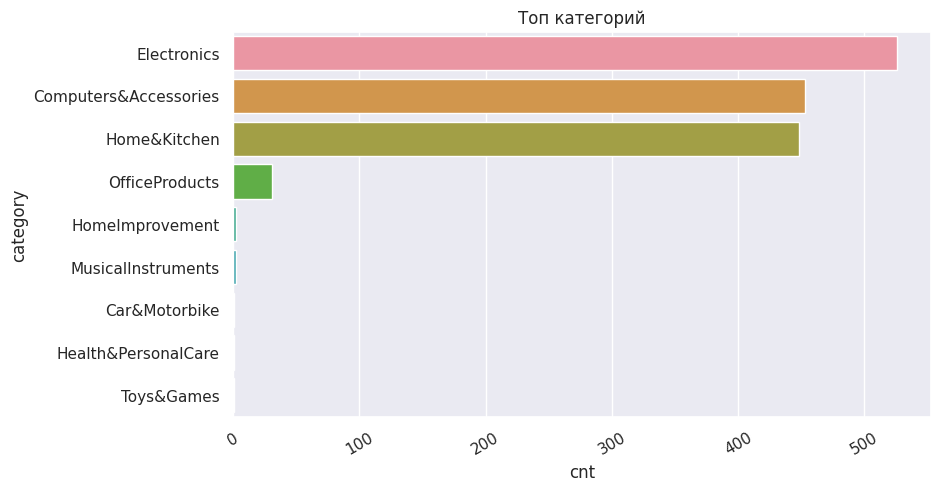

In [ ]:
sns.set_theme(style='darkgrid', palette='hls')
plt.rcParams['figure.figsize'] = (9,5)

sns.barplot(data = top_categories, y='category', x='cnt')
plt.xticks(rotation=30)
plt.title('Топ категорий')
plt.show()

Среди трёх самых популярных категорий выделим топ подкатегорий

In [ ]:
top_three_categories = list(top_categories['category'].head(3))
top_three_categories

['Electronics', 'Computers&Accessories', 'Home&Kitchen']

In [ ]:
# Найдем самые популярные категории
top_subcategories = df_prep[df_prep['category'].isin(top_three_categories)]\
                    .groupby(['category', 'subcategory'])\
                    .agg(cnt = ('actual_price', 'count'))\
                    .reset_index()\
                    .sort_values(by=['category', 'cnt'], ascending=False)

top_subcategories

,category,subcategory,cnt
21,Home&Kitchen,Kitchen&HomeAppliances,308
18,Home&Kitchen,"Heating,Cooling&AirQuality",116
19,Home&Kitchen,HomeStorage&Organization,16
17,Home&Kitchen,CraftMaterials,7
20,Home&Kitchen,Kitchen&Dining,1
13,Electronics,"HomeTheater,TV&Video",162
14,Electronics,Mobiles&Accessories,161
16,Electronics,WearableTechnology,76
11,Electronics,"Headphones,Earbuds&Accessories",66
9,Electronics,Cameras&Photography,16


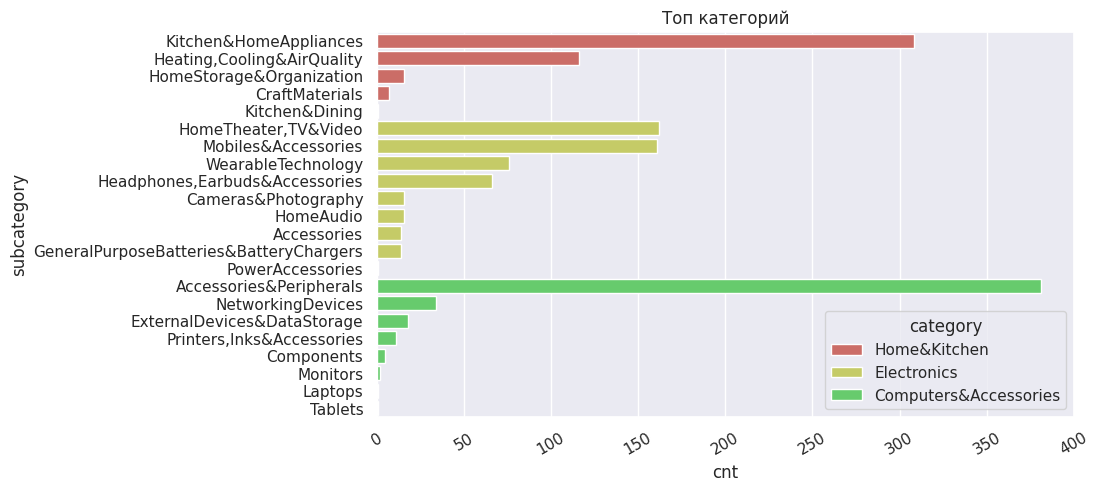

In [ ]:
plt.rcParams['figure.figsize'] = (9,5)
sns.barplot(data=top_subcategories, y='subcategory', x='cnt', hue='category', dodge=False)
plt.xticks(rotation=30)
plt.title('Топ категорий')
plt.show()

Аксессуары и периферия - самая популярная подкатегория среди всех остальных

### Проведем разведочный анализ по рейтингам и стомости товаров

В анализе будем учитывать только товары из 3х самых популярных категорий

In [ ]:
df_top = df_prep[df_prep['category'].isin(top_three_categories)].copy()

Покажем распределение рейтингов для товаров

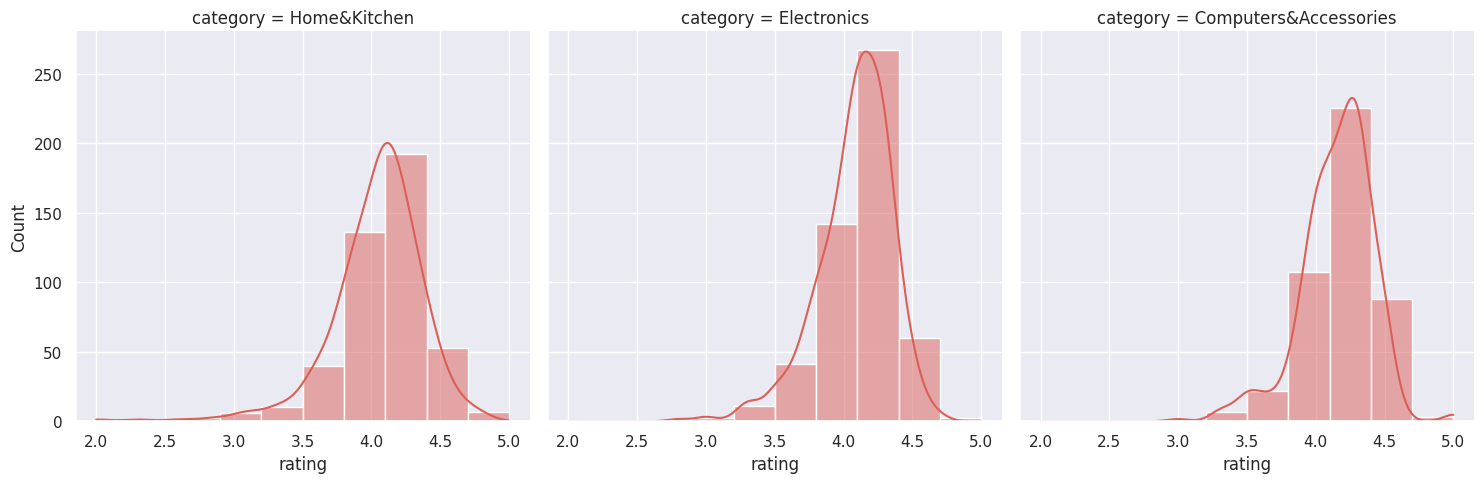

In [ ]:
sns.displot(data=df_top, x='rating', kde=True, col='category', bins=10)
plt.show()

In [ ]:
df_top

,category,subcategory,actual_price,discounted_price,discount_percentage,rating,rating_count
0,Home&Kitchen,"Heating,Cooling&AirQuality",2495.0,1299.0,48.0,2.0,2.0
1,Home&Kitchen,Kitchen&HomeAppliances,1499.0,669.0,55.0,2.3,13.0
2,Home&Kitchen,Kitchen&HomeAppliances,300.0,161.0,46.0,2.6,24.0
3,Electronics,WearableTechnology,1999.0,281.0,86.0,2.8,87.0
4,Home&Kitchen,Kitchen&HomeAppliances,2199.0,499.0,77.0,2.8,109.0
...,...,...,...,...,...,...,...
1511,Home&Kitchen,"Heating,Cooling&AirQuality",1999.0,1439.0,28.0,4.8,53803.0
1512,Computers&Accessories,Accessories&Peripherals,999.0,249.0,75.0,5.0,NaN
1513,Computers&Accessories,Accessories&Peripherals,1000.0,499.0,50.0,5.0,23.0
1514,Computers&Accessories,Accessories&Peripherals,1999.0,399.0,80.0,5.0,5.0


<ipython-input-53-00f58c88b0f1>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df_category, x='rating', kind='kde', hue='subcategory', common_norm=False)
<ipython-input-53-00f58c88b0f1>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df_category, x='rating', kind='kde', hue='subcategory', common_norm=False)
<ipython-input-53-00f58c88b0f1>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df_category, x='rating', kind='kde', hue='subcategory', common_norm=False)
<ipython-input-53-00f58c88b0f1>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df_category, x='rating', kind='kde', hue='subcategory', common_norm=False)


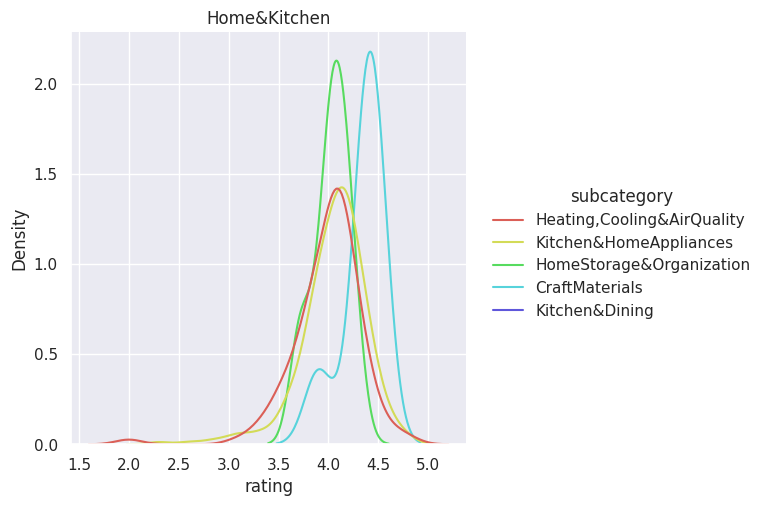

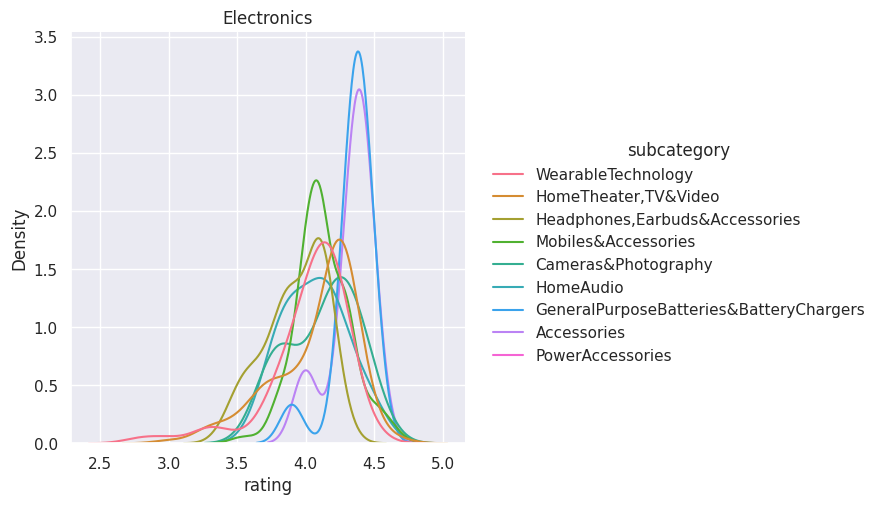

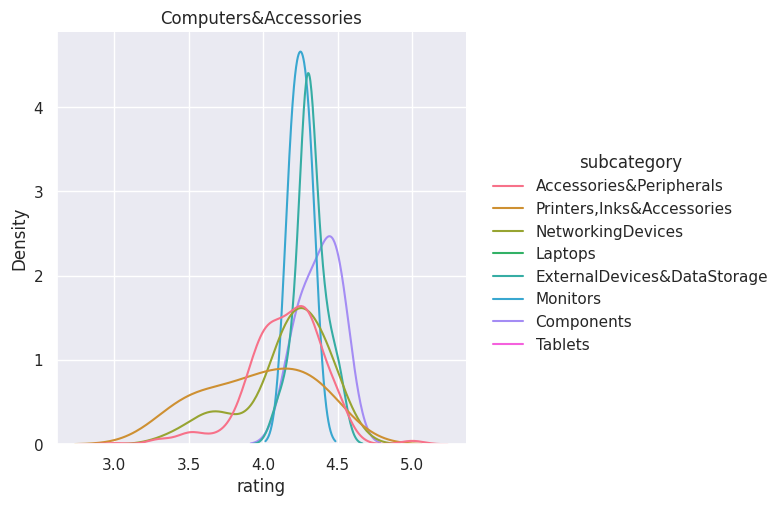

In [ ]:
for category in df_top['category'].unique():
  df_category = df_top.query('category == @category')
  sns.displot(data=df_category, x='rating', kind='kde', hue='subcategory', common_norm=False)
  plt.title(category)

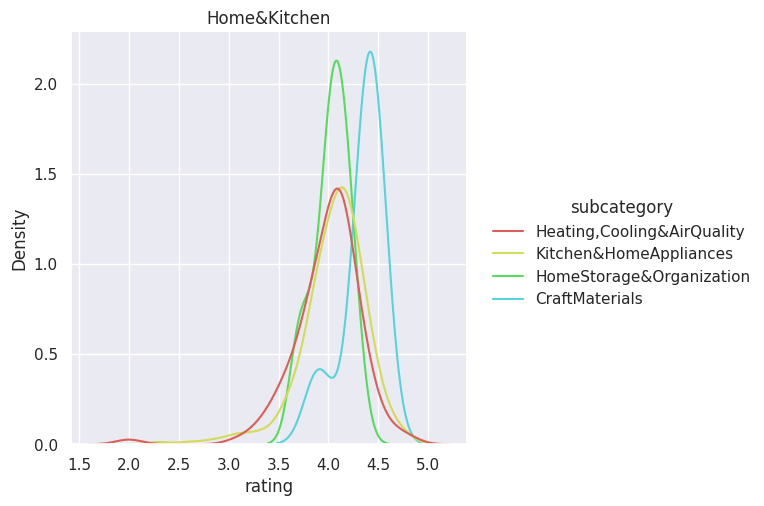

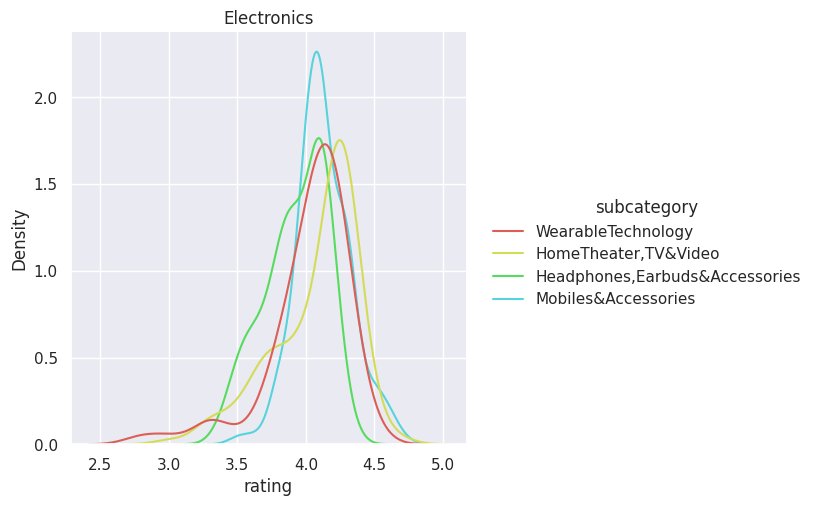

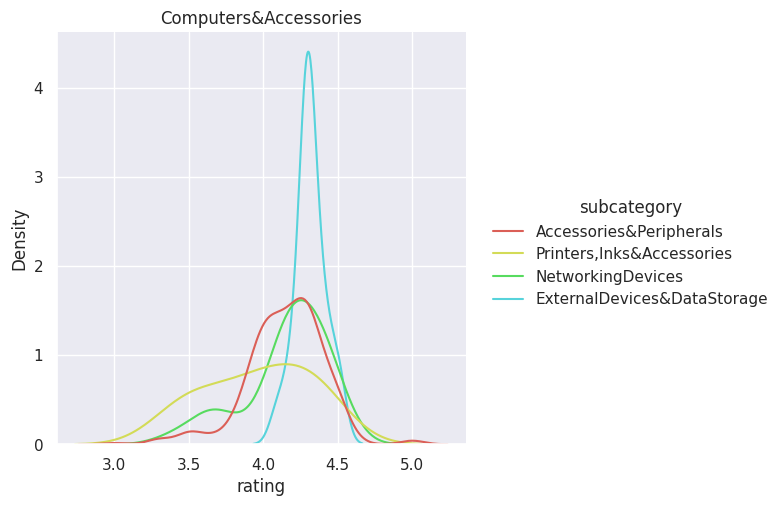

In [ ]:
#Оставим только Топ-4 подкатегории
for category in df_top['category'].unique():
  df_category = df_top.query('category == @category')
  top_sub = (df_category.groupby(['subcategory'])
              .agg(cnt = ('rating_count', 'count'))
              .reset_index().sort_values(by='cnt', ascending=False)
              .head(4)['subcategory']) #топ-4 подкатегории
  sns.displot(data=df_category.query('subcategory.isin(@top_sub)'), x='rating', kind='kde', hue='subcategory', common_norm=False)
  plt.title(category)

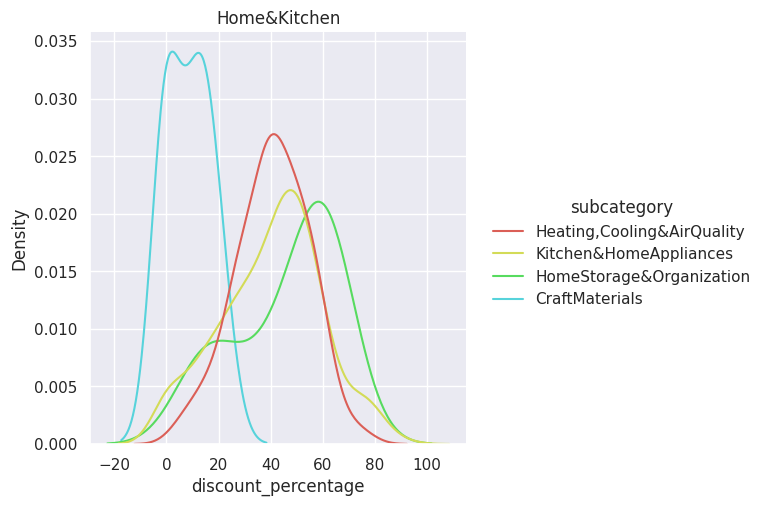

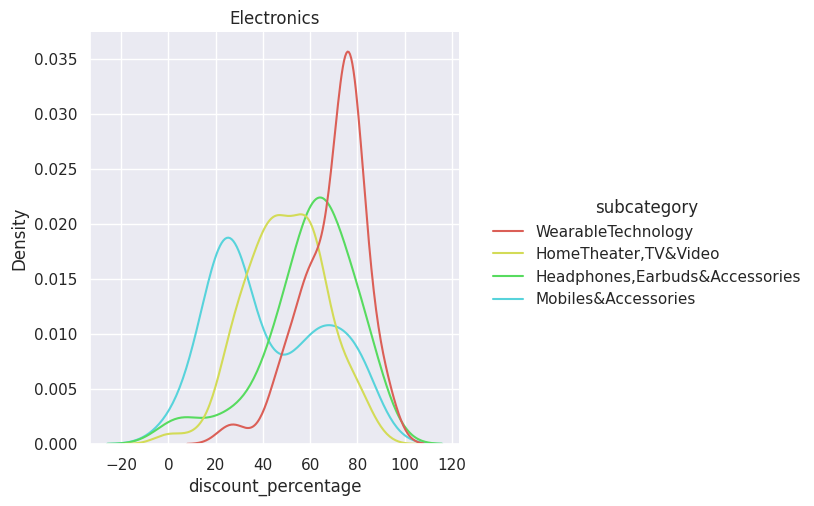

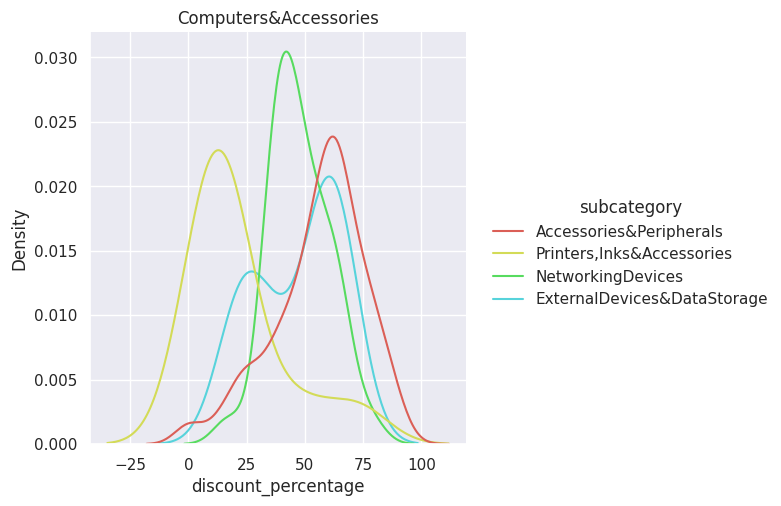

In [ ]:
#Оставим только Топ-4 подкатегории в кадой категории
for category in df_top['category'].unique():
  df_category = df_top.query('category == @category')
  top_sub = (df_category.groupby(['subcategory'])
              .agg(cnt = ('rating_count', 'count'))
              .reset_index().sort_values(by='cnt', ascending=False)
              .head(4)['subcategory']) #топ-4 подкатегории
  sns.displot(data=df_category.query('subcategory.isin(@top_sub)'), x='discount_percentage', kind='kde', hue='subcategory', common_norm=False)
  plt.title(category)

In [ ]:
# sns.boxplot(data=df_top.sort_values(by='category'), x='rating', hue='category', y='subcategory', dodge=False)
# plt.title('Рейтинг')
# plt.show()

In [ ]:
# sns.boxplot(data=df_top.sort_values(by='category'), x='discount_percentage', hue='category', y='subcategory')
# plt.title('Скидка')
# plt.show()

Разобъем товары на группы по рейтингу:

    1. Отлично: > 4.5
    2. Хорошо: > 4.0
    3. Плохо: < 4.0

In [ ]:
def rating_category(x):
    if x > 4.5:
        category = 'Отлично'
    elif x > 4:
        category = 'Хорошо'
    else:
        category = 'Плохо'

    return category

In [ ]:
df_top['rating_category'] = df_top['rating'].apply(rating_category)

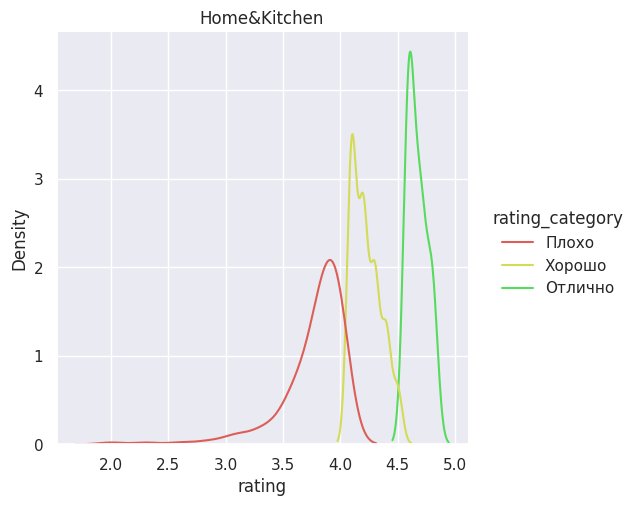

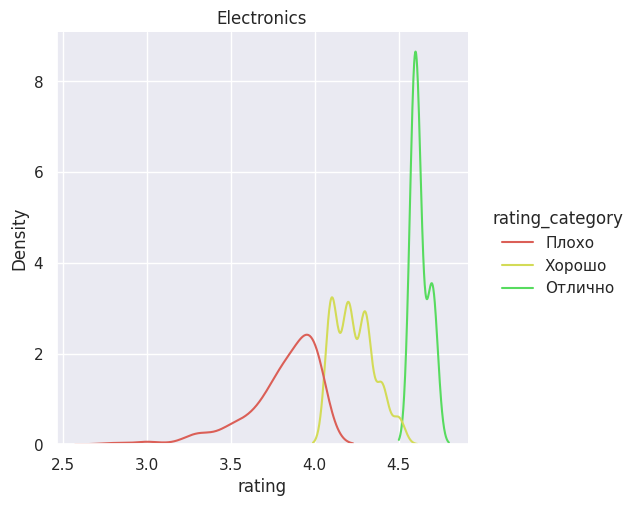

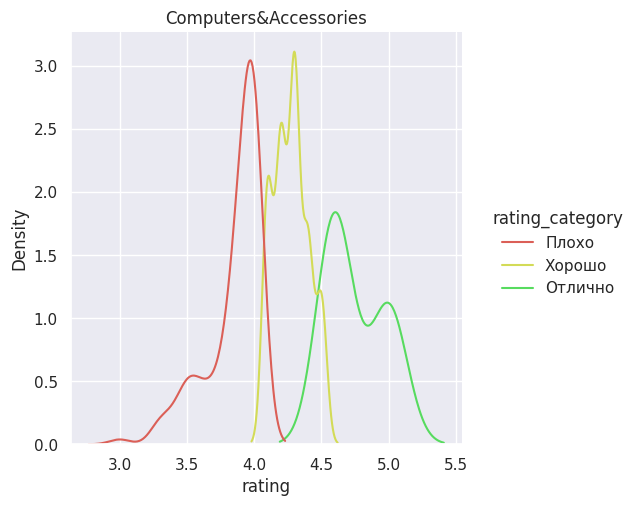

In [ ]:
for category in df_top['category'].unique():
  df_category = df_top.query('category == @category')
  sns.displot(data=df_category, x='rating', kind='kde', hue='rating_category', common_norm=False)
  plt.title(category)

In [ ]:
# sns.boxplot(data=df_top.sort_values(by='category'), x='discount_percentage', y='category', hue='rating_category')
# plt.title('Скидка')
# plt.show()

In [ ]:
df_corr = df[[
            'actual_price',
            'discounted_price',
            'discount_percentage',
            'rating',
            'rating_count'
        ]].corr()
# sns.heatmap(data=df_corr)
display(df_corr)

,actual_price,discounted_price,discount_percentage,rating,rating_count
actual_price,1.000000,0.961915,-0.118098,0.121695,-0.036137
discounted_price,0.961915,1.000000,-0.242412,0.120365,-0.027261
discount_percentage,-0.118098,-0.242412,1.000000,-0.154924,0.011691
rating,0.121695,0.120365,-0.154924,1.000000,0.102318
rating_count,-0.036137,-0.027261,0.011691,0.102318,1.000000


Взамисвязей практически нет, за исключением очевидных, например актуальная цена и цена со скидкой

## Бонус
### Найдём пользователей, которые чаще остальных оставляли отзывы

In [ ]:
df_reviewers = df[[
                'user_id',
                'user_name',
                'review_id',
                'review_title',
                'product_link',
                'category',
                'subcategory'
            ]].copy()

df_reviewers.head()

,user_id,user_name,review_id,review_title,product_link,category,subcategory
0,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",https://www.amazon.in/Khaitan-ORFin-heater-Hom...,Home&Kitchen,"Heating,Cooling&AirQuality"
1,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...",https://www.amazon.in/Personal-Blender-Portabl...,Home&Kitchen,Kitchen&HomeAppliances
2,"AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35AN...","Navin thawani,Amazon Customer,Jemiba Lawrence,...","R3M6NH8U0C7JBM,R32DO8SLNF2JSA,R3U0NCD7XO2KX4,R...","It is broken,Could have been a bit better,The ...",https://www.amazon.in/Green-Tales-Sealer-Impul...,Home&Kitchen,Kitchen&HomeAppliances
3,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...",https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...,Electronics,WearableTechnology
4,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...",https://www.amazon.in/MR-BRAND-Portable-Electr...,Home&Kitchen,Kitchen&HomeAppliances


In [ ]:
df_reviewers['user_id'] = df_reviewers['user_id'].str.split(',')
df_reviewers['user_name'] = df_reviewers['user_name'].str.split(',')
df_reviewers['review_id'] = df_reviewers['review_id'].str.split(',')
df_reviewers['review_title'] = df_reviewers['review_title'].str.split(',')

Данные о комментариях хранятся в виде массива. На один товар есть сразу несколько отзывов. Развернём массивы в строки с помощью метода .explode()

In [ ]:
# Пример работы .explode()

data = pd.DataFrame({
    'a': [[1, 2, 3]],
    'b': [['a', 'b', 'c']],
    'c': ['example']
})

display(data)
display(data.explode(column=['a', 'b']).reset_index(drop=True))

,a,b,c
0,"[1, 2, 3]","[a, b, c]",example


,a,b,c
0,1,a,example
1,2,b,example
2,3,c,example


In [ ]:
df_reviewers_rows = df_reviewers[['user_id', 'category', 'subcategory', 'product_link']].explode(column=['user_id'], ignore_index=True)
df_user_name_rows = df_reviewers['user_name'].explode(ignore_index=True)
df_title_rows = df_reviewers['review_title'].explode(ignore_index=True)

df_reviewers_rows['user_name'] = df_user_name_rows
df_reviewers_rows['review_title'] = df_title_rows

In [ ]:
df_reviewers_rows.head()

,user_id,category,subcategory,product_link,user_name,review_title
0,AGHT3K4KSG5MAQUSXRDT5VNB73GA,Home&Kitchen,"Heating,Cooling&AirQuality",https://www.amazon.in/Khaitan-ORFin-heater-Hom...,Manidipa Sengupta,Bad quality
1,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ,Home&Kitchen,"Heating,Cooling&AirQuality",https://www.amazon.in/Khaitan-ORFin-heater-Hom...,Vidisha,Amazing product..
2,AHRDA66XO63XYCBZJMW4EUJN3BFQ,Home&Kitchen,Kitchen&HomeAppliances,https://www.amazon.in/Personal-Blender-Portabl...,Manya,Nice product i recommend to buy
3,AELE2SOO7LBNHXU7UK5F7TGQHA6Q,Home&Kitchen,Kitchen&HomeAppliances,https://www.amazon.in/Personal-Blender-Portabl...,Been,Do not buy!! Defective product
4,AHAVCLRCPYO2MFYPTURF33N7XH5A,Home&Kitchen,Kitchen&HomeAppliances,https://www.amazon.in/Personal-Blender-Portabl...,Podili Parasuram,Wast of money


In [ ]:
df_top_reviewers = df_reviewers_rows\
    .groupby(['user_name'])\
    .agg(cnt = ('product_link', 'count'), unq = ('product_link', 'nunique'))\
    .sort_values(by='cnt', ascending=False)\
    .reset_index()

df_top_reviewers['rate'] = df_top_reviewers['unq'] / df_top_reviewers['cnt']
df_top_reviewers.sort_values(by='cnt', ascending=False).head()

,user_name,cnt,unq,rate
0,Amazon Customer,630,532,0.844444
1,Placeholder,59,58,0.983051
2,Kindle Customer,23,23,1.000000
3,Rajesh,22,22,1.000000
4,Deepak,17,16,0.941176


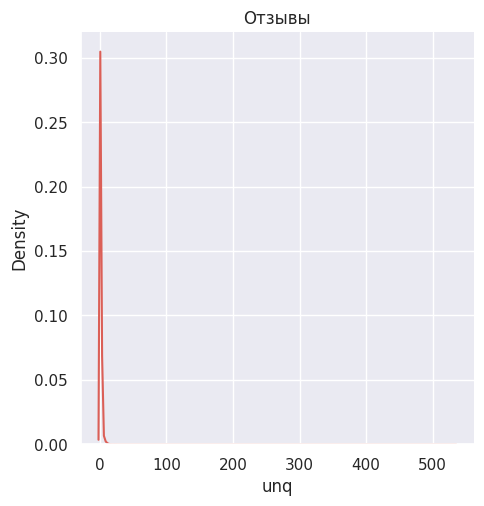

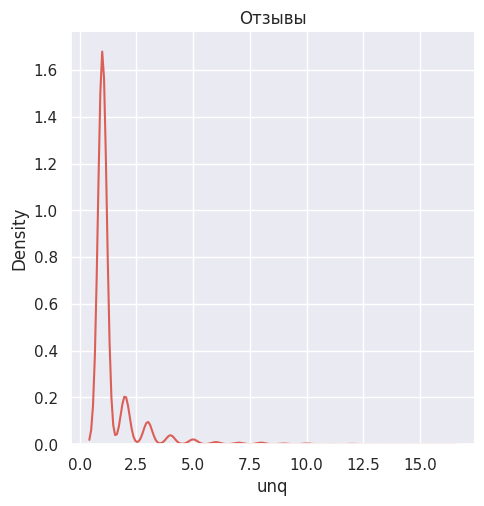

In [ ]:
sns.displot(data=df_top_reviewers, x='unq', kind='kde')
plt.title('Отзывы')
plt.show()

sns.displot(data=df_top_reviewers.query('unq < 20'), x='unq', kind='kde')
plt.title('Отзывы')
plt.show()

Длинные хвосты из-за пользователей Amazon Customer / Kndle Customer. Скорее всего это анонимные отзывы объединенные одним именем. Поэтому такую статистику лучше проводить по и идентификаторам пользователя, а не по имени

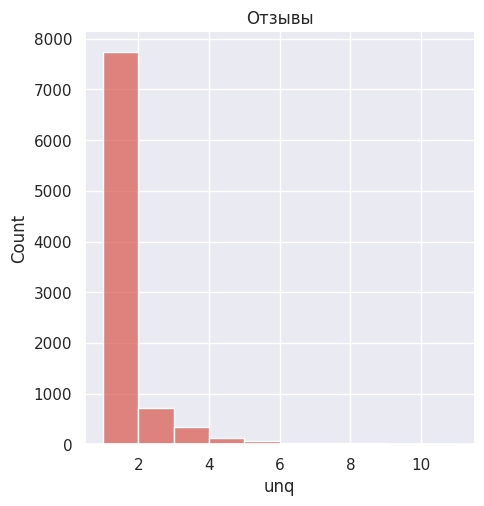

In [ ]:
df_top_reviewers = df_reviewers_rows\
    .groupby(['user_id'])\
    .agg(cnt = ('product_link', 'count'), unq = ('product_link', 'nunique'))\
    .sort_values(by='cnt', ascending=False)\
    .reset_index()

df_top_reviewers['rate'] = df_top_reviewers['unq'] / df_top_reviewers['cnt']
df_top_reviewers.sort_values(by='cnt', ascending=False).head()


sns.displot(data=df_top_reviewers, x='unq', bins=10)
plt.title('Отзывы')
plt.show()

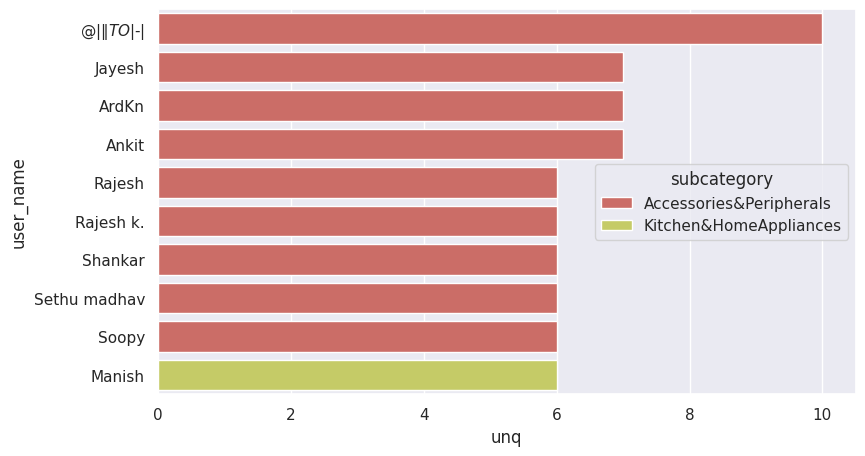

In [ ]:
df_top_reviewers = df_reviewers_rows\
    .query('~user_name.isin(["Amazon Customer", "Placeholder", "Kindle Customer"])')\
    .groupby(['user_name', 'subcategory'])\
    .agg(cnt = ('product_link', 'count'), unq = ('product_link', 'nunique'))\
    .sort_values(by='cnt', ascending=False)\
    .reset_index()

plt.rcParams['figure.figsize'] = (9, 5)
sns.barplot(data=df_top_reviewers.head(10), y='user_name', x='unq', hue='subcategory', dodge=False)
plt.show()

In [ ]:
df_reviewers_rows.query('user_name == "$@|\|TO$|-|"')

,user_id,category,subcategory,product_link,user_name,review_title
3327,AF355FTXYAKFH5NYPRTE7SL3WO3Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/FLiX-Charging-480Mbps-An...,$@|\|TO$|-|,One day delivery and installation... excellent...
3343,AF355FTXYAKFH5NYPRTE7SL3WO3Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/FLiX-Charging-480Mbps-An...,$@|\|TO$|-|,Temperature of heating
3375,AF355FTXYAKFH5NYPRTE7SL3WO3Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/FLiX-Beetel-Durable-Ligh...,$@|\|TO$|-|,Decent product
3456,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/FLiX-Charging-480Mbps-De...,$@|\|TO$|-|,Superb
3568,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/Flix-Micro-Cable-Smartph...,$@|\|TO$|-|,Good earphone comfortable feel
3680,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/FLiX-Charging-480Mbps-De...,$@|\|TO$|-|,Good Product
4016,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/Flix-Micro-Cable-Smartph...,$@|\|TO$|-|,Good product with good quality
4104,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/Flix-Micro-Cable-Smartph...,$@|\|TO$|-|,Does the job
4144,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/FLiX-Textured-charging-L...,$@|\|TO$|-|,Nice phone
4160,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Computers&Accessories,Accessories&Peripherals,https://www.amazon.in/Beetel-Smartphone-Chargi...,$@|\|TO$|-|,Nice product working absolutely fine


Все отзывы отличиные и только на одну фирму товаров. Похоже на подозрительное поведение!